# Introduction
   The following report contains two sets of data on animal and plant species that are found in 4 national parks. The first set of data includes species name, category, and their conservation status. The second set contains observations on population counts at 4 different national parks of species included on the first dataset. Together, I try to answer the following questions: 
   - Which category of species are more likely to be on conservation status? 
   - How many species fall under each category of conservation? 
   - What is the lowest observed endangered species of the category with most endangered species?
   - What are the top 5 lowest observed species for the category with most species of concern? 

## Data
   
   First data is imported and is checked for any errors or missing values. While digging through the data, I noticed that there were several species that had duplicate entries in the species_info.csv file so based on the fact that these species do change conservation status from time to time, I thought it would be best to drop the duplicates and keep the last known entry as that would likely have the most up-to-date conservation status. Once I verified the rest of the data, I merged both datasets under their shared column 'scientific_name'. All null entries conservation_status were observed to be structurally missing as these species are not on conservation lists so null entries were filled with 'Not Threatened' to allow for easier data manipulation. At the end I printed all unique category and park names to better understand what I am working with and the info of the data table to verify one last time that there are no null entries.

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

species_df = pd.read_csv('species_info.csv')
obs_df = pd.read_csv('observations.csv')
species_df.scientific_name.astype('string')
species_df['duplicate'] = species_df.scientific_name.duplicated(keep=False)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(species_df[(species_df.duplicate==True)&(species_df.conservation_status.notnull())].sort_values(by='scientific_name'))
species_df.drop('duplicate', axis = 1, inplace=True)
#Based on the duplicates seen, best to keep the last entered
species_df.drop_duplicates(subset='scientific_name', keep='last', inplace=True)    
#Now merge both dataframes by scientific_name     
df = pd.merge(
                obs_df,
                species_df,
                left_on = 'scientific_name',
                right_on = 'scientific_name',
                suffixes=['obs','species'])
#Fill any null conservation statuses as Not Threatened as these values are missing structurally due to their lack of conservation status
df.conservation_status.fillna('Not Threatened', inplace = True)
#Convert conservation_status into ranked category
df.conservation_status = pd.Categorical(df.conservation_status,['Not Threatened','In Recovery','Species of Concern','Threatened','Endangered'],ordered=True)
print(df.category.unique())
print(df.park_name.unique())
categories = df.category.unique()
print(df.info())

,category,scientific_name,common_names,conservation_status,duplicate
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True
3035,Mammal,Eptesicus fuscus,"Big Brown Bat, Big Brown Bat",Species of Concern,True
3150,Bird,Gavia immer,"Common Loon, Great Northern Diver, Great North...",Species of Concern,True
172,Bird,Gavia immer,Common Loon,Species of Concern,True
3037,Mammal,Lasionycteris noctivagans,"Silver-Haired Bat, Silver-Haired Bat",Species of Concern,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True
3039,Mammal,Myotis californicus,"California Myotis, California Myotis, Californ...",Species of Concern,True


['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23295
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   scientific_name      23296 non-null  object  
 1   park_name            23296 non-null  object  
 2   observations         23296 non-null  int64   
 3   category             23296 non-null  object  
 4   common_names         23296 non-null  object  
 5   conservation_status  23296 non-null  category
dtypes: category(1), int64(1), object(4)
memory usage: 1.1+ MB
None


## Methods
   For analyzing my data, I decided for each question I would create copies of the merged dataset with filters specifically made to answer each question I set out to answer. Once the data was filtered and values were aggregated based on what I needed, I then would portray that in bar plot to visually understand the data.

## Analysis
    
    
    
To begin, I set out to answer my first two questions by grouping the data into category of species and their conservation status. The values this data holds I thought would be best to be a count of unique scientific names to ensure species are not being counted multiple times. From there I created a pivot table showcasing each category of species and the amount of species under each conservation status. Then I simplified it down to whether or not they were protected to find which category has a higher rate of being on the conservation list. Lastly for this section, a bar plot was made for each conservation status and the number of species under each category.

Ultimately, I got the following answers: 
- Mammals are the most likely to be on the conservation status at 0.21 protected species for every unprotected.
- Vascular plants are the least likely at 0.01 protected for every unprotected.
- Birds have the most species that are of concern.
- Fish have the most species that are threatened.
- Mammals have the most species that are endangered.
- Birds are the only species that are in recovery.
    


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Not Threatened,72,413,114,146,328,73,4216
In Recovery,0,3,0,0,0,0,0
Species of Concern,4,68,4,22,5,5,43
Threatened,2,0,4,2,0,0,2
Endangered,1,4,3,6,0,0,1


Total Not Threatened: 5362
Total on Conservation List: 179
Ratio:29.955307262569832


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
protected,,,,,,,
False,72.0,413.00,114.0,146.00,328.00,73.00,4216.00
True,7.0,75.00,11.0,30.00,5.00,5.00,46.00
Ratio,0.1,0.18,0.1,0.21,0.02,0.07,0.01


Based on the ratios calculated above, one can see that mammals are more likely to be on the conservation list, and birds have the most species on protected status 


<Figure size 640x480 with 0 Axes>

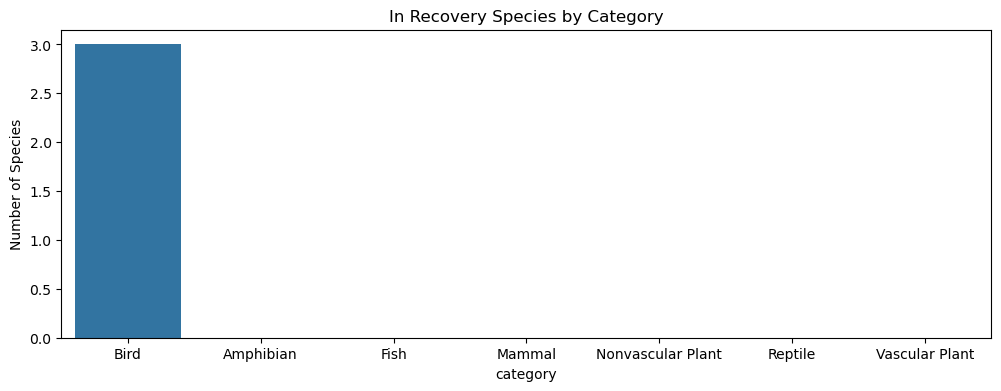

<Figure size 640x480 with 0 Axes>

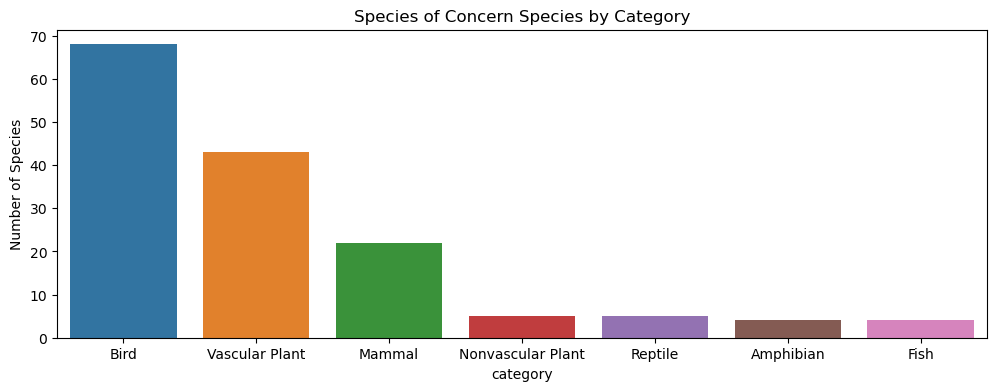

<Figure size 640x480 with 0 Axes>

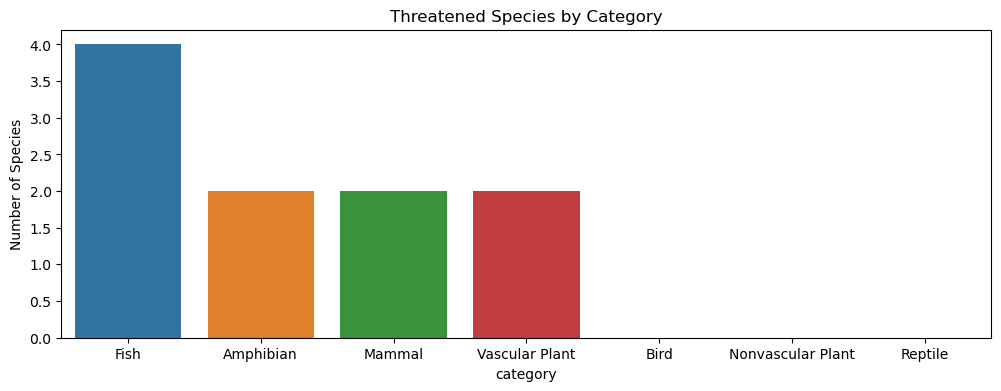

<Figure size 640x480 with 0 Axes>

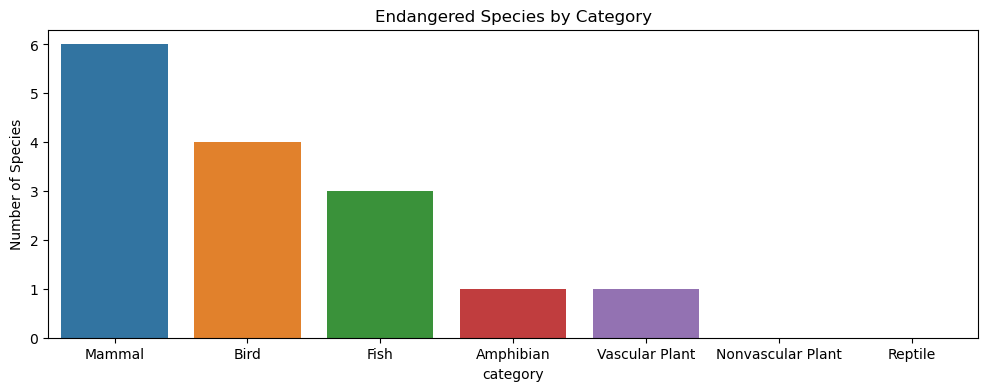

In [302]:

#Order of Observations by Park
#print(list(df.groupby('park_name').observations.sum().sort_values(ascending=False).index))

df1=df.groupby(['category','conservation_status']).scientific_name.nunique().reset_index()
#df1.conservation_status = pd.Categorical(df1.conservation_status,['In Recovery', 'Threatened','Endangered'],ordered=True)
#df1.dropna(inplace=True)
pivot_df1 = df1.pivot(index='conservation_status', columns='category', values='scientific_name')
display(pivot_df1)
total_not_threatened=df[df.conservation_status=='Not Threatened'].scientific_name.nunique()
total_conservation=df[df.conservation_status!='Not Threatened'].scientific_name.nunique()
ratio = total_not_threatened/total_conservation
print('Total Not Threatened: {}\nTotal on Conservation List: {}\nRatio:{}'.format(total_not_threatened,total_conservation,ratio))

df1.conservation_status=df1.conservation_status.astype('string')
df1['protected'] = df1.conservation_status != 'Not Threatened'
df2 = df1.groupby(['category', 'protected']).scientific_name.sum().reset_index()


def ratio(series):
    return round(reduce(lambda x,y: y/x, series),2)

pivot2_df2 = df2.pivot_table(index='protected', columns='category', values='scientific_name',margins=True, margins_name = 'Ratio',aggfunc=ratio).iloc[:,:-1]
display(pivot2_df2)
print('Based on the ratios calculated above, one can see that mammals are more likely to be on the conservation list, and birds have the most species on protected status ')

df1.drop(df1[df1['conservation_status'] == 'Not Threatened'].index, inplace=True)

for i in list(df1.conservation_status.unique()):    
    plt.figure(figsize=(12,4))
    plt.title('{} Species by Category'.format(i))
    sns.barplot(data=df1[df1.conservation_status==i].sort_values(by='scientific_name', ascending=False), x='category', y='scientific_name')
    plt.ylabel('Number of Species')
    plt.show()
    plt.clf()





Now nowing that mammals are more likely to be endangered I set out to see which specific species had lowest amount of observations across the 4 parks to determine the most vulnerable species. Based on the first chart, I was able to decipher that is the Canis Rufus, also known as the Red Wolf, that has had the least amount of sightings. Breaking that data up by park one can see that the Red Wolf is most endangered at the Great Smoky Mountains National Park and most abundant at Yellowstone National Park.

<Figure size 640x480 with 0 Axes>

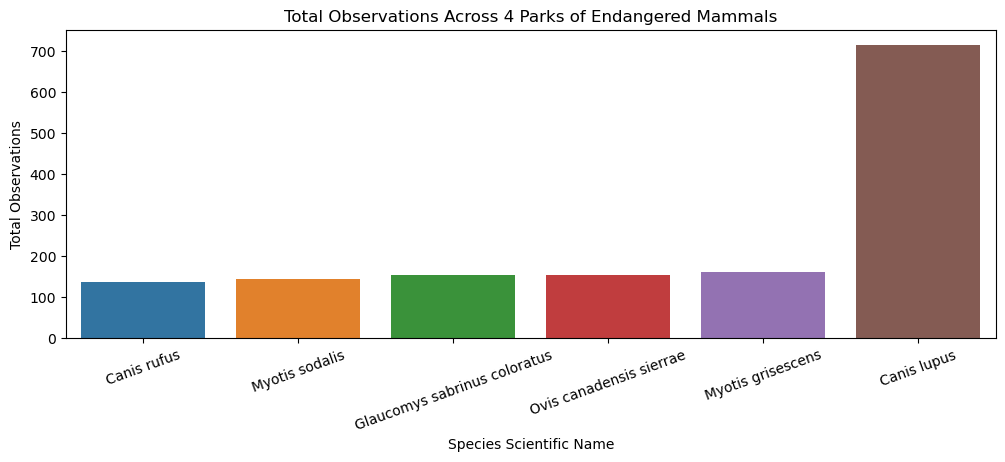

Canis Rufus is the lowest observed mammal on the endangered species list, also known as the: Red Wolf


<Figure size 640x480 with 0 Axes>

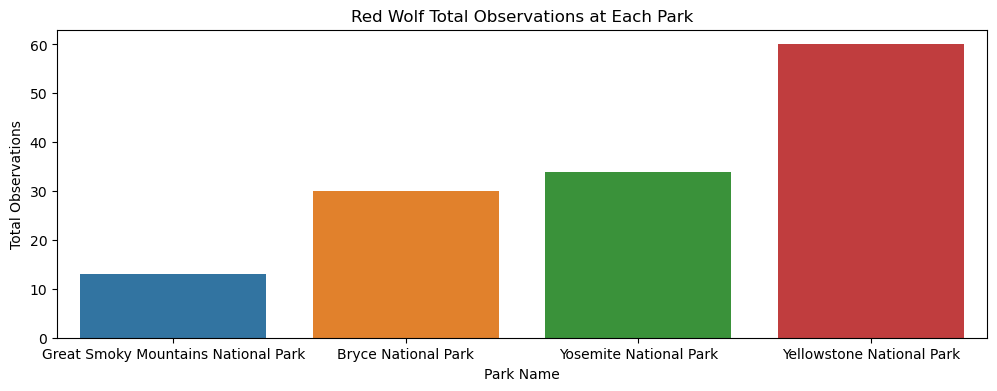

In [301]:
df2=df[(df.category=='Mammal') & (df.conservation_status=='Endangered')].groupby(['park_name','scientific_name']).observations.sum().reset_index()
df2_2=df2.groupby('scientific_name').observations.sum().reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data=df2_2.sort_values(by='observations'), x='scientific_name', y='observations')
plt.title('Total Observations Across 4 Parks of Endangered Mammals')
plt.ylabel('Total Observations')
plt.xlabel('Species Scientific Name')
plt.xticks(rotation=20)
plt.show()
plt.clf()

print('Canis Rufus is the lowest observed mammal on the endangered species list, also known as the: ' + str(df[df.scientific_name == 'Canis rufus'].common_names.max()))

plt.figure(figsize=(12,4))
sns.barplot(data=df2[df2.scientific_name == 'Canis rufus'].sort_values(by='observations'), x='park_name', y='observations')
plt.title('Red Wolf Total Observations at Each Park')
plt.ylabel('Total Observations')
plt.xlabel('Park Name')
plt.show()
plt.clf()


Lastly, I set out to see what are the top 5 lowest observed species of concern under the category with most species of concern which happens to be birds. Below I print out the common names of the top 5 and a bar plot portraying the total amount of observations of each and a second bar plot that splits the five up by park. 

Top 5 Lowest Observed Species on the Species of Concern List are: 
Double-Crested Cormorant
Sharp-Shinned Hawk
Brown Creeper
Turkey Vulture
Red-Shouldered Hawk

Below on the charts, you will see their scientific names in order of the list.


<Figure size 640x480 with 0 Axes>

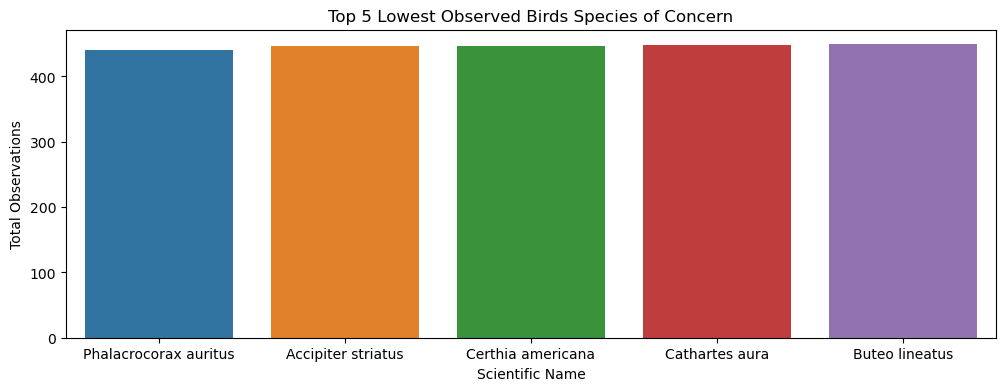

<Figure size 640x480 with 0 Axes>

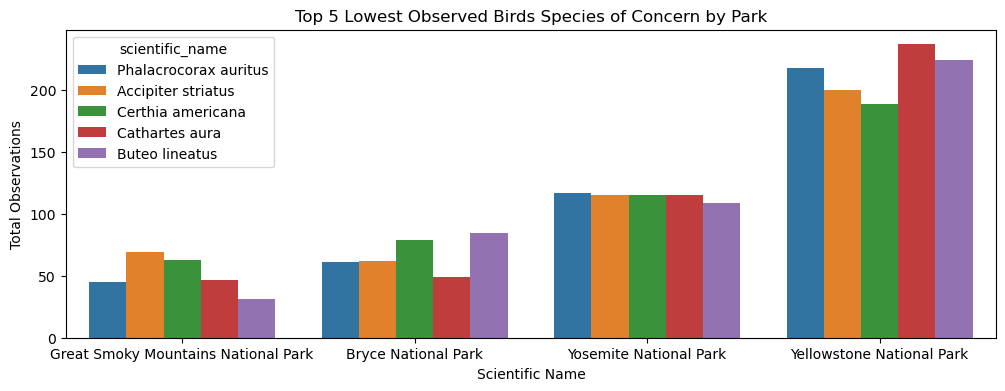

In [310]:
df3 = df[(df['category'] == 'Bird') & (df['conservation_status'] == 'Species of Concern')].groupby(['scientific_name', 'park_name']).observations.sum().reset_index().sort_values(by=['observations'])
df3_2=df3.groupby(['scientific_name']).observations.sum().reset_index().sort_values(by=['observations'])

print('Top 5 Lowest Observed Species on the Species of Concern List are: ')
for name in list(df3_2.head().scientific_name):
    print(df[df.scientific_name == name].common_names.max())
print('\nBelow on the charts, you will see their scientific names in order of the list.')

plt.figure(figsize=(12,4))
sns.barplot(data=df3_2.head(), x='scientific_name', y='observations')
plt.xlabel('Scientific Name')
plt.ylabel('Total Observations')
plt.title('Top 5 Lowest Observed Birds Species of Concern')
plt.show()
plt.clf()


plt.figure(figsize=(12,4))
sns.barplot(data=df3[df3.scientific_name.isin(top_5)], x = 'park_name', y = 'observations', hue='scientific_name', hue_order = top_5)
plt.xlabel('Scientific Name')
plt.ylabel('Total Observations')
plt.title('Top 5 Lowest Observed Birds Species of Concern by Park')
plt.show()
plt.clf()

## Conclusion
Based on the findings one can find some key takeaways that could help National Parks shift focus to certain species to aid in conservation efforts. The data shows us that mammals are more likely to be have a protection status and have the most endangered species. Of those endangered mammals, the species with the lowest observations is the Red Wolf and its observations is lowest at the Great Smoky Mountains National Park and highest at the Yosemite National Park. For species of concern, birds have the highest amount of species on the list and the top 5 lowest observed species were the Double-Crested Cormorant, Sharp-Shinned Hawk, Brown Creeper, Turkey Vulture, Red-Shouldered Hawk. From here, hypothetically, parks could continue research and verify these findings to create action plans like attempting to transfer species of higher concern from parks with higher populations to parks with lower populations. 